In [162]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [163]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [164]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,text_length,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,85,7373,35072
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,pekinese,0.090647,True,papillon,0.068957,True,138,5494,30366
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,121,3632,22829
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,79,7550,38342
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,138,8137,36622


In [165]:
#It can be seen that the Dtype has been lost for timestamp and dog_stage while exporting and loading the data 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2058 non-null   int64  
 1   timestamp       2058 non-null   object 
 2   source          2058 non-null   object 
 3   text            2058 non-null   object 
 4   expanded_urls   2058 non-null   object 
 5   rating          2058 non-null   int64  
 6   name            2058 non-null   object 
 7   dog_stage       2058 non-null   object 
 8   jpg_url         2058 non-null   object 
 9   img_num         2058 non-null   int64  
 10  p1              2058 non-null   object 
 11  p1_conf         2058 non-null   float64
 12  p1_dog          2058 non-null   bool   
 13  p2              2058 non-null   object 
 14  p2_conf         2058 non-null   float64
 15  p2_dog          2058 non-null   bool   
 16  p3              2058 non-null   object 
 17  p3_conf         2058 non-null   f

In [166]:
#convert timestamp in datetime type
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
#convert dogstage to categorical
df_master.dog_stage = df_master.dog_stage.astype('category')

In [167]:
#check
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2058 non-null   int64              
 1   timestamp       2058 non-null   datetime64[ns, UTC]
 2   source          2058 non-null   object             
 3   text            2058 non-null   object             
 4   expanded_urls   2058 non-null   object             
 5   rating          2058 non-null   int64              
 6   name            2058 non-null   object             
 7   dog_stage       2058 non-null   category           
 8   jpg_url         2058 non-null   object             
 9   img_num         2058 non-null   int64              
 10  p1              2058 non-null   object             
 11  p1_conf         2058 non-null   float64            
 12  p1_dog          2058 non-null   bool               
 13  p2              2058 non-null   o

In [168]:
df_master.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,text_length,retweet_count,favorite_count
count,2.058000e+03,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2058.000000
mean,7.378686e+17,12.266278,1.204082,0.594164,1.347594e-01,6.043075e-02,111.557823,2480.689018,7737.717201
std,6.758285e+16,40.847762,0.563121,0.271226,1.007185e-01,5.099716e-02,26.283223,4333.163701,11691.240002
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,13.000000,11.000000,0.000000
25%,6.763054e+17,10.000000,1.000000,0.363272,5.393988e-02,1.624755e-02,94.000000,531.500000,1469.250000
50%,7.113353e+17,11.000000,1.000000,0.587635,1.184015e-01,4.947920e-02,116.000000,1174.500000,3408.000000
75%,7.929060e+17,12.000000,1.000000,0.843883,1.958557e-01,9.241083e-02,137.000000,2846.000000,9644.500000
max,8.924206e+17,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,148.000000,74430.000000,150797.000000


##### `Insight 1` 
- Are higher rating dogs' tweet more retweeted or more favorited?

##### `Insight 2` 
- Are lengthy tweets more retweeted or favorited?

##### `Insight 3` 
- Do lengthy tweet have a higher rating?

## Insight 1

#####  Are higher rating dogs' tweet more retweeted or more favorited?

In [169]:
mean_rating = df_master.describe()['rating'].iloc[1]
df_master['rating_mean_relative'] = df_master["rating"].apply(lambda x: "High" if x > mean_rating else "Low" )

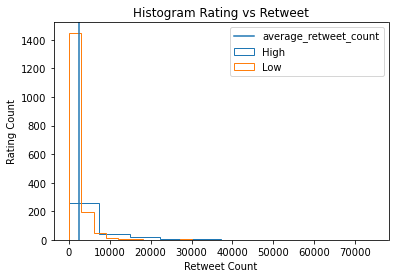

In [170]:
df_master[df_master.rating > mean_rating]['retweet_count'].plot.hist(label="High", legend=True, histtype="step")
df_master[df_master.rating <= mean_rating]['retweet_count'].plot.hist(label="Low", legend=True, histtype="step")
plt.axvline(df_master.retweet_count.mean(), label="average_retweet_count")
plt.xlabel('Retweet Count')
plt.ylabel('Rating Count')
plt.title('Histogram Rating vs Retweet');
plt.legend()
plt.show()

In this graph it can be seen that tweets with low retweet count have mostly below average rating and tweets with high retweet count have high rating. The blue vertical line is the average reweet count.

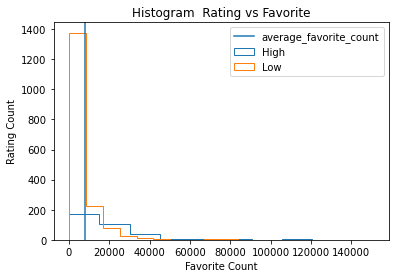

In [171]:
df_master[df_master.rating > mean_rating]['favorite_count'].plot.hist(label="High", legend=True, histtype="step")
df_master[df_master.rating <= mean_rating]['favorite_count'].plot.hist(label="Low", legend=True, histtype="step")
plt.axvline(df_master.favorite_count.mean(), label="average_favorite_count")
plt.xlabel('Favorite Count')
plt.ylabel('Rating Count')
plt.title('Histogram  Rating vs Favorite');
plt.legend()
plt.show()

In this graph it can be seen that tweets with low favorite count have mostly below average rating and tweets with high favorite count have high rating. The blue vertical line is the average favorite count.

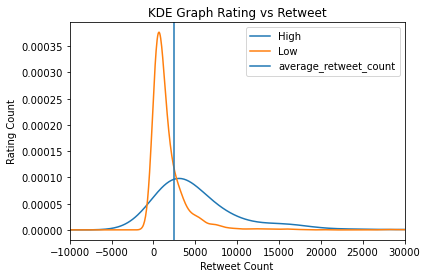

In [172]:
df_master[df_master.rating > mean_rating]['retweet_count'].plot.kde(label="High", legend=True)
df_master[df_master.rating <= mean_rating]['retweet_count'].plot.kde(label="Low", legend=True)
plt.axvline(df_master.retweet_count.mean(), label="average_retweet_count")
plt.xlim(-10000, 30000)
plt.xlabel('Retweet Count')
plt.ylabel('Rating Count')
plt.title('KDE Graph Rating vs Retweet');
plt.legend()
plt.show()

Similarly to the histograms in this KDE graph the more retweets a tweet has the more rating it gets

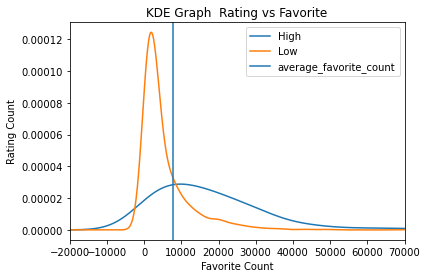

In [173]:
df_master[df_master.rating > mean_rating]['favorite_count'].plot.kde(label="High", legend=True)
df_master[df_master.rating <= mean_rating]['favorite_count'].plot.kde(label="Low", legend=True)
plt.axvline(df_master.favorite_count.mean(), label="average_favorite_count")
plt.xlim(-20000, 70000)
plt.xlabel('Favorite Count')
plt.ylabel('Rating Count')
plt.title('KDE Graph  Rating vs Favorite');
plt.legend()
plt.show()

In this KDE graph the more favorite count a tweet has the more rating it gets. On the contrary the lower rating a tweet receives the lower favorite count it gets.

## Insight 2

#####  Are lengthy tweets more retweeted or favorited?

In [174]:
df_master.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,text_length,retweet_count,favorite_count
count,2.058000e+03,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2058.000000,2058.000000
mean,7.378686e+17,12.266278,1.204082,0.594164,1.347594e-01,6.043075e-02,111.557823,2480.689018,7737.717201
std,6.758285e+16,40.847762,0.563121,0.271226,1.007185e-01,5.099716e-02,26.283223,4333.163701,11691.240002
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,13.000000,11.000000,0.000000
25%,6.763054e+17,10.000000,1.000000,0.363272,5.393988e-02,1.624755e-02,94.000000,531.500000,1469.250000
50%,7.113353e+17,11.000000,1.000000,0.587635,1.184015e-01,4.947920e-02,116.000000,1174.500000,3408.000000
75%,7.929060e+17,12.000000,1.000000,0.843883,1.958557e-01,9.241083e-02,137.000000,2846.000000,9644.500000
max,8.924206e+17,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,148.000000,74430.000000,150797.000000


In [175]:
mean_rating_25 = df_master.describe()['text_length'].iloc[4]
display(mean_rating_25)
mean_rating_50 = df_master.describe()['text_length'].iloc[5]
display(mean_rating_50)
mean_rating_75 = df_master.describe()['text_length'].iloc[6]
display(mean_rating_75)

94.0

116.0

137.0

In [176]:
def create_rating(df):
    if df < mean_rating_25:
        return "LOWEST"
    elif df >= mean_rating_25 and df < mean_rating_50:
        return "LOW"
    elif df >= mean_rating_50 and df < mean_rating_75:
        return "HIGH"
    elif df >= mean_rating_75:
        return "HIGHEST"
    else:
        return df 

In [177]:
df_master['text_length_mean_relative'] = df_master["text_length"].apply(create_rating)

In [178]:
df_master['text_length_mean_relative'].value_counts()

HIGH       519
HIGHEST    517
LOW        516
LOWEST     506
Name: text_length_mean_relative, dtype: int64

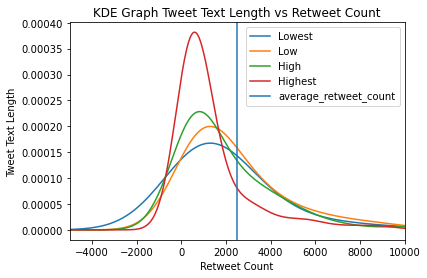

In [179]:
df_master[df_master.text_length_mean_relative == 'LOWEST']['retweet_count'].plot.kde(label="Lowest", legend=True)
df_master[df_master.text_length_mean_relative == 'LOW']['retweet_count'].plot.kde(label="Low", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGH']['retweet_count'].plot.kde(label="High", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGHEST']['retweet_count'].plot.kde(label="Highest", legend=True)
plt.axvline(df_master.retweet_count.mean(), label="average_retweet_count")
plt.xlim(-5000, 10000)
plt.xlabel('Retweet Count')
plt.ylabel('Tweet Text Length')
plt.title('KDE Graph Tweet Text Length vs Retweet Count');
plt.legend()
plt.show()

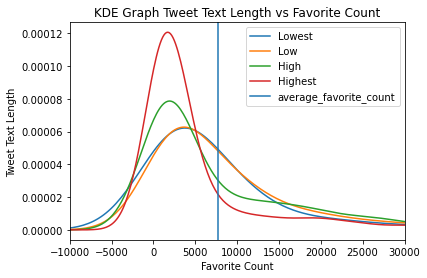

In [180]:
df_master[df_master.text_length_mean_relative == 'LOWEST']['favorite_count'].plot.kde(label="Lowest", legend=True)
df_master[df_master.text_length_mean_relative == 'LOW']['favorite_count'].plot.kde(label="Low", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGH']['favorite_count'].plot.kde(label="High", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGHEST']['favorite_count'].plot.kde(label="Highest", legend=True)
plt.axvline(df_master.favorite_count.mean(), label="average_favorite_count")
plt.xlim(-10000, 30000)
plt.xlabel('Favorite Count')
plt.ylabel('Tweet Text Length')
plt.title('KDE Graph Tweet Text Length vs Favorite Count');
plt.legend()
plt.show()

## Insight 3

#####  Do lengthy tweet have a higher rating?

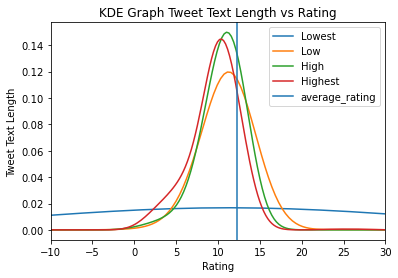

In [181]:
df_master[df_master.text_length_mean_relative == 'LOWEST']['rating'].plot.kde(label="Lowest", legend=True)
df_master[df_master.text_length_mean_relative == 'LOW']['rating'].plot.kde(label="Low", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGH']['rating'].plot.kde(label="High", legend=True)
df_master[df_master.text_length_mean_relative == 'HIGHEST']['rating'].plot.kde(label="Highest", legend=True)
plt.axvline(df_master.rating.mean(), label="average_rating")
plt.xlim(-10, 30)
plt.xlabel('Rating')
plt.ylabel('Tweet Text Length')
plt.title('KDE Graph Tweet Text Length vs Rating');
plt.legend()
plt.show()

In this graph it can be seen that below average rating of around 12 the lengthy tweets predominate. That is the green and red curves which means High and Highest length of tweets. In the meantime tweets which have rating above average tend to be represented by the orange and green curves that is the tweets with less than averagte number of characters.  

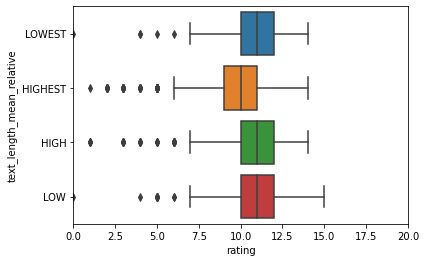

In [182]:
sns.boxplot(x="rating", y="text_length_mean_relative", data=df_master).set(xlim=(0, 20))
plt.show()

The graph above shows that the upper quarter('HIGHEST') above the average of text lenght of tweets has a lower rating as it shows the orange box shift to the left. This box also shows that the minimum is in this quarter. Whilst the highest rating is in the low quarter('LOW') represented by the tweets that have 25% less text in average. 

## Summary

After analyzing the relationship between rating with rewteed count and favorite count. Tweets in the low rating range tend to have lower favorite count and tweets with high rating have a higher favorite count. The same happen with retweeted count. 
Regarding tweet length vs retweet count and favorite count. It was seen that the lenghy tweets do not show much retweet count while the shortet ones in the average range of 0-75% are quite similar when they are above the average retweet count. The lenghty vs favorite count was similar to the retweet count but the second curve representing 'HIGH' length was closer to the 'HIGHEST'. Finally, I found out that lenghy tweets have usually less rating so that the shortest tweets in average have higher rating.